# Uncertainties and Distributions

The [astropy.uncertainty](http://docs.astropy.org/en/stable/uncertainty/index.html) sub-package is a relatively new sub-package which provides a framework for doing uncertainty propagation in calculations. For now, this is focused on the more accurate but slower method of tracking uncertainties by Monte-Carlo sampling. Since it is a relatively new sub-package, it is possible that it will evolve a little over time.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create distributions</li>
<li>Plot distributions</li>
<li>Extract useful statistics</li>
<li>Combine distributions</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.uncertainty. For more information about the features presented below as well as other available features, you can read the
[astropy.uncertainty documentation](https://docs.astropy.org/en/stable/uncertainty/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating distributions

The central object in astropy.uncertainty is the [Distribution](http://docs.astropy.org/en/stable/api/astropy.uncertainty.Distribution.html#astropy.uncertainty.Distribution) class, which can be thought of as a quantity with an underlying distribution of values. Several helper functions are provided to create standard distributions:

In [3]:
from astropy import units as u
from astropy import uncertainty as unc

In [4]:
distance = unc.normal(4 * u.kpc, std=0.5 * u.kpc, n_samples=10000)
distance

<QuantityDistribution [3.72618525, 4.16002681, 4.19211078, ..., 4.08027358, 4.14643122,
           4.22132802] kpc with n_samples=10000>

In [9]:
velocity = unc.uniform(center=5 * u.km/u.s, width=2 * u.km/u.s, n_samples=10000)
velocity

<QuantityDistribution [5.62776974, 4.22665834, 4.02796484, ..., 4.11667151, 4.83386377,
           4.40708545] km / s with n_samples=10000>

You can also create arbitrary distributions - see the [documentation](http://docs.astropy.org/en/stable/uncertainty/index.html#creating-distributions) for more details.

The easiest way to visualize these distributions is to use the ``.distribution`` attribute of the ``Distribution`` objects, which returns the individual Monte-Carlo samples:

In [11]:
from astropy.visualization import quantity_support, hist
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x121773450>

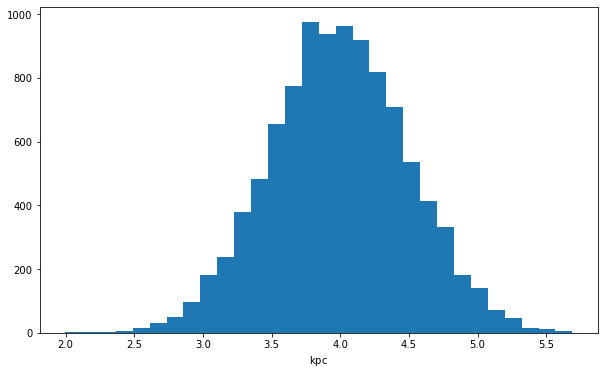

In [13]:
hist(distance.distribution, bins='knuth');

## Using distributions

Now that we have created a couple of distributions, we can use properties on these distributions to compute useful values:

In [15]:
distance.unit

Unit("kpc")

In [16]:
distance.n_samples

10000

In [18]:
distance.pdf_mean()

<Quantity 3.99139735 kpc>

In [19]:
distance.pdf_std()

<Quantity 0.5018204 kpc>

In [20]:
distance.pdf_smad()

<Quantity 0.50216883 kpc>

Distributions can be combined with quantities seamlessly:

In [21]:
velocity_fixed_time = distance / (2 *u.Myr)
velocity_fixed_time

<QuantityDistribution [1.86309263, 2.0800134 , 2.09605539, ..., 2.04013679, 2.07321561,
           2.11066401] kpc / Myr with n_samples=10000>

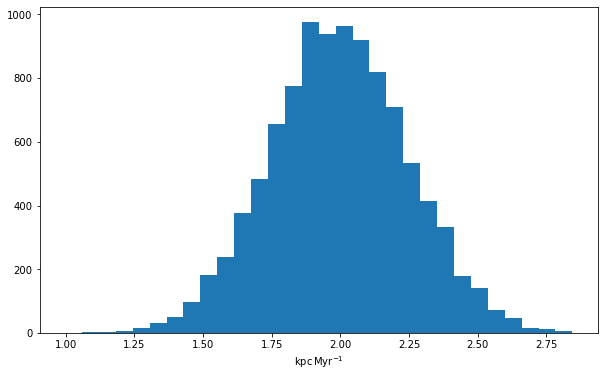

In [22]:
hist(velocity_fixed_time.distribution, bins = 'knuth');

and distributions can also be combined with other distributions:

In [24]:
time = distance / velocity
time

<QuantityDistribution [0.66210691, 0.98423541, 1.04075158, ..., 0.99115841, 0.85778818,
           0.95785028] kpc s / km with n_samples=10000>

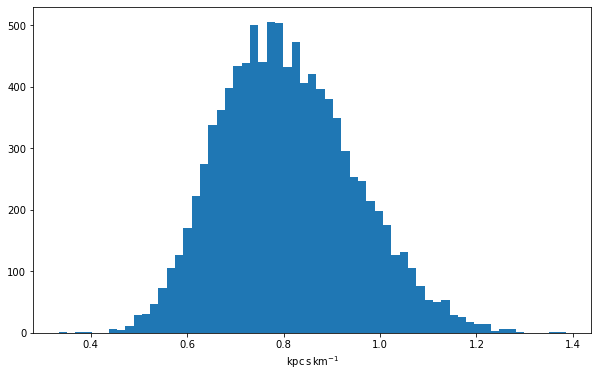

In [25]:
hist(time.distribution, bins= 'knuth');

Provided that the distributions have samples that match one-to-one, correlations are properly taken into account - that is, if one does:

In [26]:
import numpy as np
time = distance * np.sqrt(velocity) / velocity ** 1.5

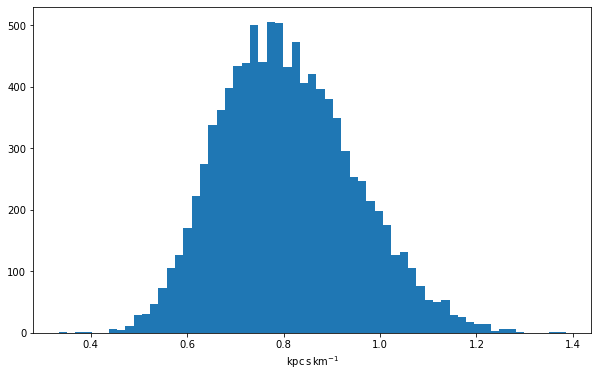

In [28]:
hist(time.distribution, bins = 'knuth');

Note that this is only the case if the samples match one to one (see [this section](http://docs.astropy.org/en/stable/uncertainty/index.html#covariance-in-distributions-and-discrete-sampling-effects) in the documentation for more details about this).

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)